In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset=pd.read_csv("/content/iriaas.csv", header=None)

In [ ]:
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset0=dataset.rename(columns={0:'SepalLength'},inplace=True)
dataset1=dataset.rename(columns={1:'SepalWidth'},inplace=True)
dataset2=dataset.rename(columns={2:'PetalLength'},inplace=True)
dataset3=dataset.rename(columns={3:'PetalWidth'},inplace=True)
dataset4=dataset.rename(columns={4:'Species'},inplace=True)

In [ ]:
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


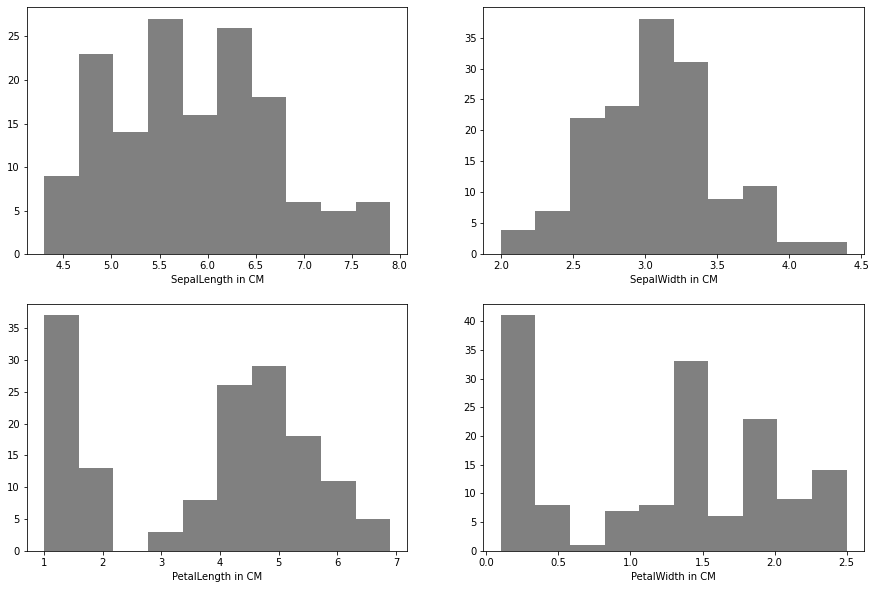

In [ ]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
# Price
ax1.hist(dataset['SepalLength'],color='grey')
ax1.set_xlabel('SepalLength in CM')
# Open
ax2.hist(dataset['SepalWidth'],color='grey')
ax2.set_xlabel('SepalWidth in CM')
# High
ax3.hist(dataset['PetalLength'],color='grey')
ax3.set_xlabel('PetalLength in CM')
# Low
ax4.hist(dataset['PetalWidth'],color='grey')
ax4.set_xlabel('PetalWidth in CM')
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

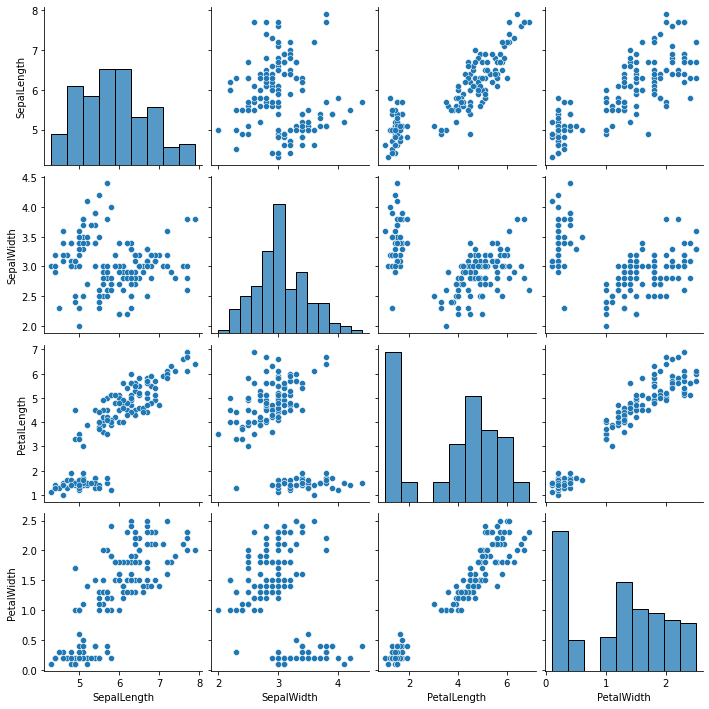

In [ ]:
sns.pairplot(data=dataset,kind='scatter')

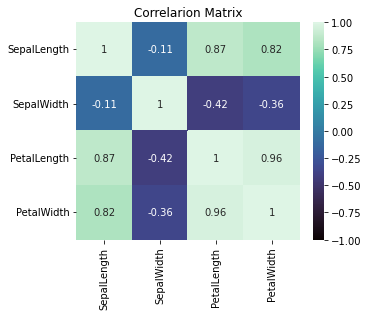

In [ ]:
corr=dataset.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako')
plt.title('Correlarion Matrix')
plt.show()

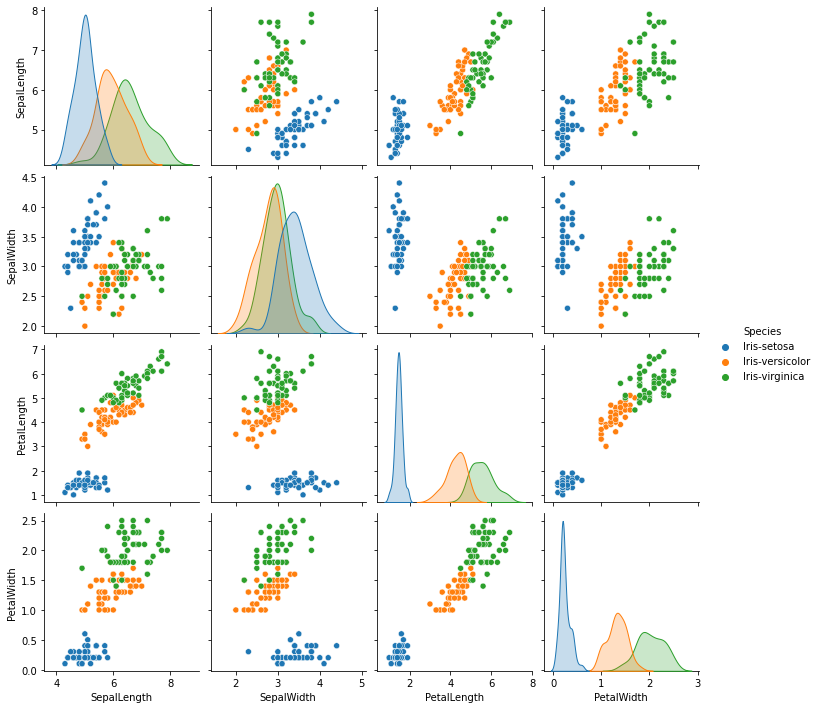

In [ ]:
sns.pairplot(data=dataset,hue='Species')

In [ ]:
from sklearn.cluster import KMeans
LIST=[]
x=dataset[['SepalLength','SepalWidth','PetalLength','PetalWidth']].to_numpy()
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  LIST.append(kmeans.inertia_)

In [ ]:
kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
  

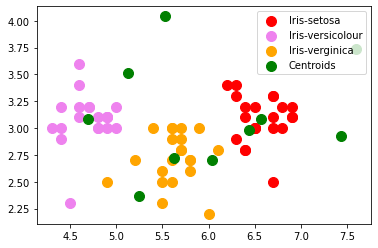

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='violet',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='orange',label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label='Centroids')
plt.legend()

# **Thank You!!**